In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# read data
monthly_avg_data = pd.read_csv("analysis_monthly_avg.csv")
monthly_avg = monthly_avg_data.set_index("DEST_CITY_NAME")
monthly_avg

,YEARLY_AVG,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DEST_CITY_NAME,,,,,,,,,,,,,
"Amsterdam, Netherlands",1543190.2,91505.2,75592.2,107990.2,132992.4,159123.4,162264.2,147283.2,164825.4,155944.4,137153.8,99926.6,108589.2
"Cancun, Mexico",3761081.8,309181.2,318929.4,394818.4,334011.8,326086.6,355326.0,372564.4,299043.0,183154.6,228564.6,278587.0,360814.8
"London, United Kingdom",2811659.0,187661.4,143290.0,207920.6,238232.0,264697.6,297033.6,258365.4,282617.6,271376.8,228461.0,201949.4,230053.6
"Mexico City, Mexico",1599692.4,128736.6,107547.8,121466.2,116774.6,123001.6,141108.4,155904.8,144418.8,114915.4,132419.4,139961.6,173437.2
"Paris, France",1425761.4,83466.2,67376.4,105123.6,118943.2,145812.0,155217.4,140572.2,148760.6,140555.4,119060.0,91660.0,109214.4
"Punta Cana, Dominican Republic",1294762.8,89834.6,99100.6,127465.8,112788.2,116602.8,146220.2,169855.6,116870.2,57878.2,66417.8,82939.6,108789.2
"San Jose del Cabo, Mexico",1223624.0,91225.4,100929.2,133882.2,111107.0,103764.6,120193.8,122687.2,93939.2,53041.6,79674.2,96496.2,116683.4
"Tokyo, Japan",2447534.8,197732.2,184500.2,225549.8,170352.6,208884.4,220942.8,208070.8,229965.6,211589.8,203541.8,188810.4,197594.4
"Toronto, Canada",1623207.2,116941.8,110637.2,137276.8,132203.2,146855.2,143214.8,148652.0,158408.4,143892.0,143263.6,125004.6,116857.6


In [3]:
# create y axis
y_axis_amster = monthly_avg.iloc[0]["JAN":"DEC"]
y_axis_cancun = monthly_avg.iloc[1]["JAN":"DEC"]
y_axis_london = monthly_avg.iloc[2]["JAN":"DEC"]
y_axis_mexicocity = monthly_avg.iloc[3]["JAN":"DEC"]
y_axis_paris = monthly_avg.iloc[4]["JAN":"DEC"]
y_axis_puntacana = monthly_avg.iloc[5]["JAN":"DEC"]
y_axis_sjdelcabo = monthly_avg.iloc[6]["JAN":"DEC"]
y_axis_tokyo = monthly_avg.iloc[7]["JAN":"DEC"]
y_axis_toronto = monthly_avg.iloc[8]["JAN":"DEC"]
y_axis_vancou = monthly_avg.iloc[9]["JAN":"DEC"]

In [4]:
top_city_avg = pd.read_csv("top_cities_average_weather.csv")
top_city = top_city_avg.set_index("City")
top_city

,January,February,March,April,May,June,July,August,September,October,November,December
City,,,,,,,,,,,,
Cancun,75.4,76.6,78.4,81.3,83.7,84.6,85.1,85.5,84.0,81.5,78.6,76.1
London,44.2,44.2,47.8,53.6,58.6,64.9,67.3,66.9,63.1,56.3,50.0,44.6
Tokyo,41.4,42.3,47.7,57.0,64.8,70.5,77.0,79.5,73.0,63.5,53.8,45.7
Toronto,25.3,27.3,34.5,46.2,57.4,66.9,72.1,70.7,63.0,51.3,40.8,31.1
Mexico City,58.3,60.6,64.6,67.3,68.0,66.9,64.8,64.9,64.4,62.8,61.3,59.0
Amsterdam,38.1,38.3,43.0,48.4,55.2,69.7,63.7,63.5,58.5,51.8,44.8,39.2
Paris,40.8,42.1,47.8,52.7,59.4,64.9,68.9,68.5,62.4,55.4,46.9,41.9
Punta Cana,76.6,76.5,77.0,77.9,79.5,81.0,81.5,81.9,81.7,80.6,79.3,77.4
Vancouver,39.4,40.8,44.4,48.9,55.0,60.3,64.4,64.4,58.8,50.5,43.3,38.5


In [18]:
# create x axis
x_axis_cancun = top_city.iloc[0]["January":"December"]
x_axis_london = top_city.iloc[1]["January":"December"]
x_axis_tokyo = top_city.iloc[2]["January":"December"]
x_axis_toronto = top_city.iloc[3]["January":"December"]
x_axis_mexicocity = top_city.iloc[4]["January":"December"]
x_axis_amster = top_city.iloc[5]["January":"December"]
x_axis_paris = top_city.iloc[6]["January":"December"]
x_axis_puntacana = top_city.iloc[7]["January":"December"]
x_axis_vancou = top_city.iloc[8]["January":"December"]
x_axis_sjdelcabo = top_city.iloc[9]["January":"December"]

In [19]:
# amster regress
amster_slope, amster_int, amster_r, amster_p, amster_std_err = stats.linregress(
    x_axis_amster, y_axis_amster)
amster_fit = amster_slope * x_axis_amster + amster_int
# cancun regress
cancun_slope, cancun_int, cancun_r, cancun_p, cancun_std_err = stats.linregress(
    x_axis_cancun, y_axis_cancun)
cancun_fit = cancun_slope * x_axis_cancun + cancun_int
# london regress
london_slope, london_int, london_r, london_p, london_std_err = stats.linregress(
    x_axis_london, y_axis_london)
london_fit = london_slope * x_axis_london + london_int
# mexicocity regress
mexicocity_slope, mexicocity_int, mexicocity_r, mexicocity_p, mexicocity_std_err = stats.linregress(
    x_axis_mexicocity, y_axis_mexicocity)
mexicocity_fit = mexicocity_slope * x_axis_mexicocity + mexicocity_int
# paris regress
paris_slope, paris_int, paris_r, paris_p, paris_std_err = stats.linregress(
    x_axis_paris, y_axis_paris)
paris_fit = paris_slope * x_axis_paris + paris_int
# puntacana regress
puntacana_slope, puntacana_int, puntacana_r, puntacana_p, puntacana_std_err = stats.linregress(
    x_axis_puntacana, y_axis_puntacana)
puntacana_fit = puntacana_slope * x_axis_puntacana + puntacana_int
# sjdelcabo regress
sjdelcabo_slope, sjdelcabo_int, sjdelcabo_r, sjdelcabo_p, sjdelcabo_std_err = stats.linregress(
    x_axis_sjdelcabo, y_axis_sjdelcabo)
sjdelcabo_fit = sjdelcabo_slope * x_axis_sjdelcabo + sjdelcabo_int
# tokyo regress
tokyo_slope, tokyo_int, tokyo_r, tokyo_p, tokyo_std_err = stats.linregress(
    x_axis_tokyo, y_axis_tokyo)
tokyo_fit = tokyo_slope * x_axis_tokyo + tokyo_int
# toronto regress
toronto_slope, toronto_int, toronto_r, toronto_p, toronto_std_err = stats.linregress(
    x_axis_toronto, y_axis_toronto)
toronto_fit = toronto_slope * x_axis_toronto + toronto_int
# vancou regress
vancou_slope, vancou_int, vancou_r, vancou_p, vancou_std_err = stats.linregress(
    x_axis_vancou, y_axis_vancou)
vancou_fit = vancou_slope * x_axis_vancou + vancou_int

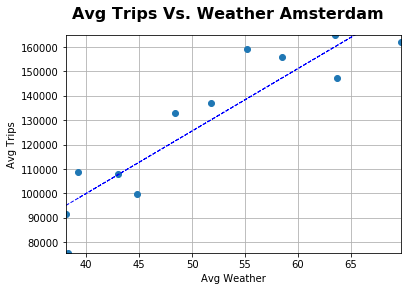

In [30]:
# Plot Amsterdam
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather Amsterdam", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_amster), max(x_axis_amster))
ax.set_ylim(min(y_axis_amster), max(y_axis_amster))
ax.plot(x_axis_amster, y_axis_amster, linewidth=0, marker="o")
ax.plot(x_axis_amster, amster_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

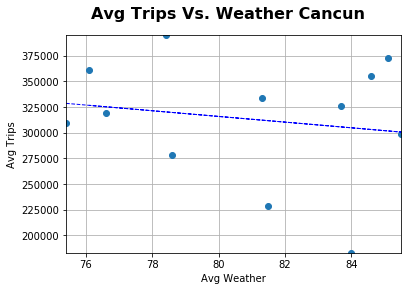

In [31]:
# Plot cancun
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather Cancun", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_cancun), max(x_axis_cancun))
ax.set_ylim(min(y_axis_cancun), max(y_axis_cancun))
ax.plot(x_axis_cancun, y_axis_cancun, linewidth=0, marker="o")
ax.plot(x_axis_cancun, cancun_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

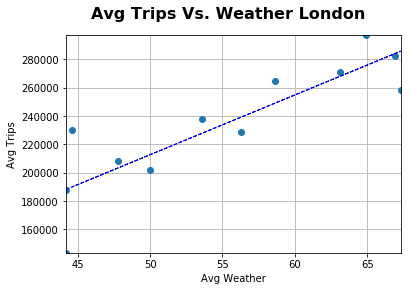

In [32]:
# Plot London
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather London", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_london), max(x_axis_london))
ax.set_ylim(min(y_axis_london), max(y_axis_london))
ax.plot(x_axis_london, y_axis_london, linewidth=0, marker="o")
ax.plot(x_axis_london, london_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

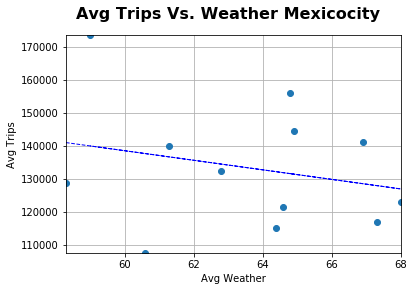

In [33]:
# Plot Mexicocity
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather Mexicocity", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_mexicocity), max(x_axis_mexicocity))
ax.set_ylim(min(y_axis_mexicocity), max(y_axis_mexicocity))
ax.plot(x_axis_mexicocity, y_axis_mexicocity, linewidth=0, marker="o")
ax.plot(x_axis_mexicocity, mexicocity_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

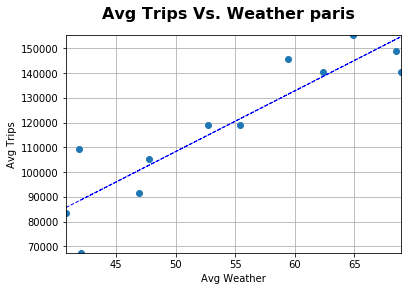

In [34]:
# Plot paris
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather paris", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_paris), max(x_axis_paris))
ax.set_ylim(min(y_axis_paris), max(y_axis_paris))
ax.plot(x_axis_paris, y_axis_paris, linewidth=0, marker="o")
ax.plot(x_axis_paris, paris_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

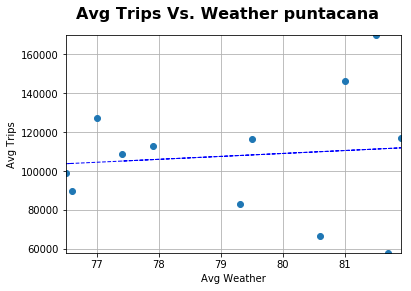

In [35]:
# Plot puntacana
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather puntacana", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_puntacana), max(x_axis_puntacana))
ax.set_ylim(min(y_axis_puntacana), max(y_axis_puntacana))
ax.plot(x_axis_puntacana, y_axis_puntacana, linewidth=0, marker="o")
ax.plot(x_axis_puntacana, puntacana_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

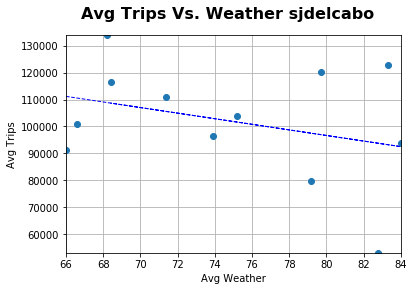

In [36]:
# Plot sjdelcabo
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather sjdelcabo", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_sjdelcabo), max(x_axis_sjdelcabo))
ax.set_ylim(min(y_axis_sjdelcabo), max(y_axis_sjdelcabo))
ax.plot(x_axis_sjdelcabo, y_axis_sjdelcabo, linewidth=0, marker="o")
ax.plot(x_axis_sjdelcabo, sjdelcabo_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

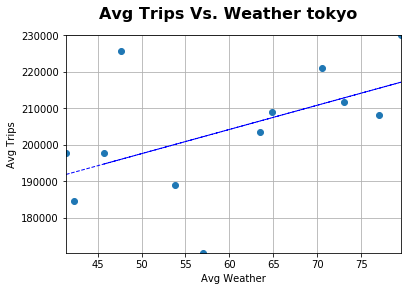

In [37]:
# Plot tokyo
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather tokyo", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_tokyo), max(x_axis_tokyo))
ax.set_ylim(min(y_axis_tokyo), max(y_axis_tokyo))
ax.plot(x_axis_tokyo, y_axis_tokyo, linewidth=0, marker="o")
ax.plot(x_axis_tokyo, tokyo_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

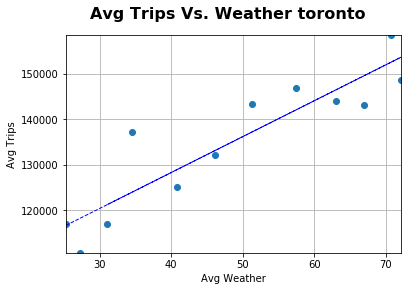

In [38]:
# Plot toronto
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather toronto", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_toronto), max(x_axis_toronto))
ax.set_ylim(min(y_axis_toronto), max(y_axis_toronto))
ax.plot(x_axis_toronto, y_axis_toronto, linewidth=0, marker="o")
ax.plot(x_axis_toronto, toronto_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()

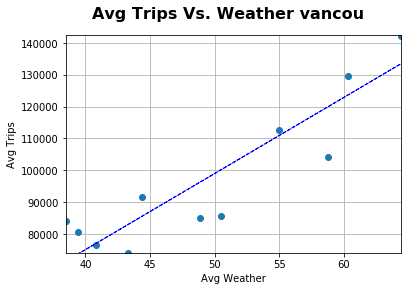

In [39]:
# Plot vancou
fig, ax = plt.subplots()
fig.suptitle("Avg Trips Vs. Weather vancou", fontsize=16, fontweight="bold")

ax.set_xlim(min(x_axis_vancou), max(x_axis_vancou))
ax.set_ylim(min(y_axis_vancou), max(y_axis_vancou))
ax.plot(x_axis_vancou, y_axis_vancou, linewidth=0, marker="o")
ax.plot(x_axis_vancou, vancou_fit, "b--", linewidth=1)
ax.set_ylabel("Avg Trips")
ax.set_xlabel("Avg Weather")
plt.grid()
plt.show()